[**Demo %s**](#demo-traffic-solveb)

Now we use an initial condition with a larger bump. Note that the scale on the $y$-axis is much different for this solution.

In [15]:
rho_init = 400 + 80 * exp( -16*(x - 3).^2 );
ivp.InitialValue = rho_init;
t = linspace(0, 0.5, 81);
sol = solve(ivp, t);
RHO = sol.Solution;

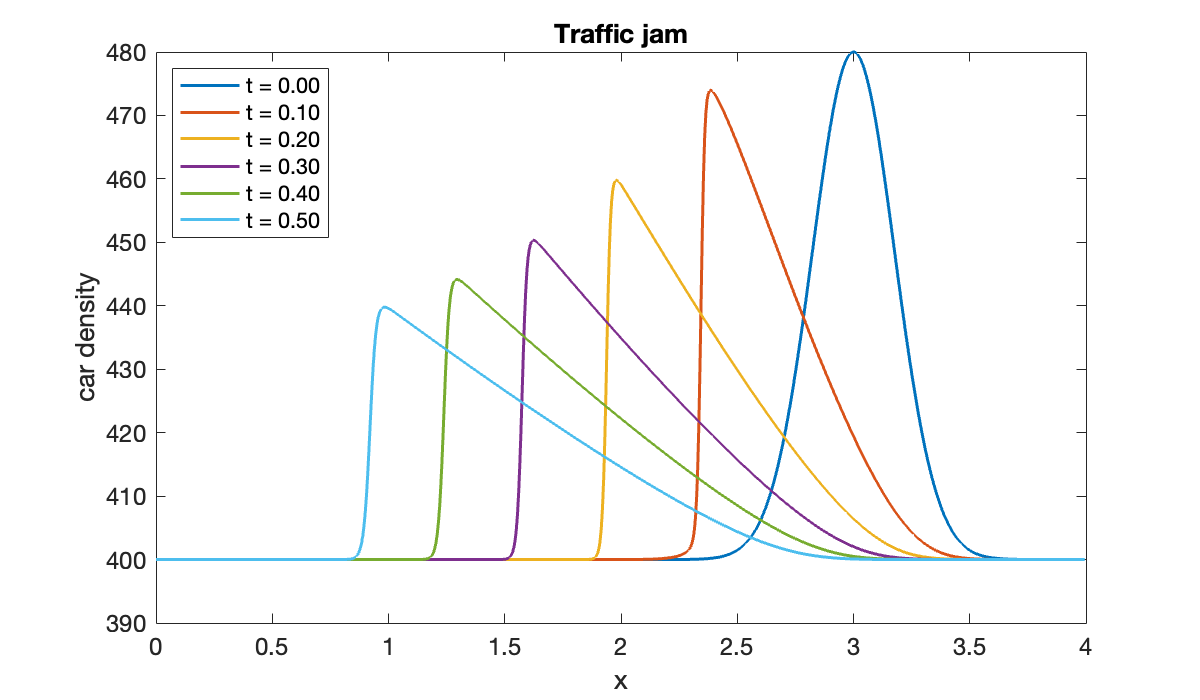

In [16]:
for plot_idx = 1:16:81
    str = sprintf("t = %.2f", t(plot_idx));
    plot(x, RHO(:, plot_idx), displayname=str)
    hold on
end
xlabel('x'),  ylabel('car density')
title('Traffic jam') 
legend(location="northwest")

In [ ]:
clf
plot(x, RHO(:, 1))
hold on,  grid on
axis([0, 4, 395, 480])
title('Traffic jam') 
xlabel('x'),  ylabel('u(x,t)')
vid = VideoWriter("traffic-jam.mp4", "MPEG-4");
vid.Quality = 85;
open(vid);
for frame = 1:length(t)
    cla, plot(x, RHO(:, frame))
    str = sprintf("t = %.2f", t(frame));
    text(0.2, 470, str);
    writeVideo(vid, frame2im(getframe(gcf)));
end
close(vid)
close(gcf)

In this case the density bump travels backward along the road. It also steepens on the side facing the incoming traffic and decreases much more slowly on the other side. A motorist would experience this as an abrupt increase in density, followed by a much more gradual decrease in density and resulting gradual increase in speed. (You also see some transient, high-frequency oscillations. These are caused by instabilities, as we discuss in simpler situations later in this chapter.)